**Medical Insurance Charges Predictor**

Predicting Insurance charges using Linear Regression model, simple EDA, train-test-split, scikit_learn module.

In [ ]:
dataset = 'https://drive.google.com/file/d/1TPF6yxwgfZ6hdVc9RcS7odkhGnf2CMoQ/view?usp=drive_link'

In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading data

df = pd.read_csv('insurance_data.csv')

Exploratory Data Analysis

In [ ]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


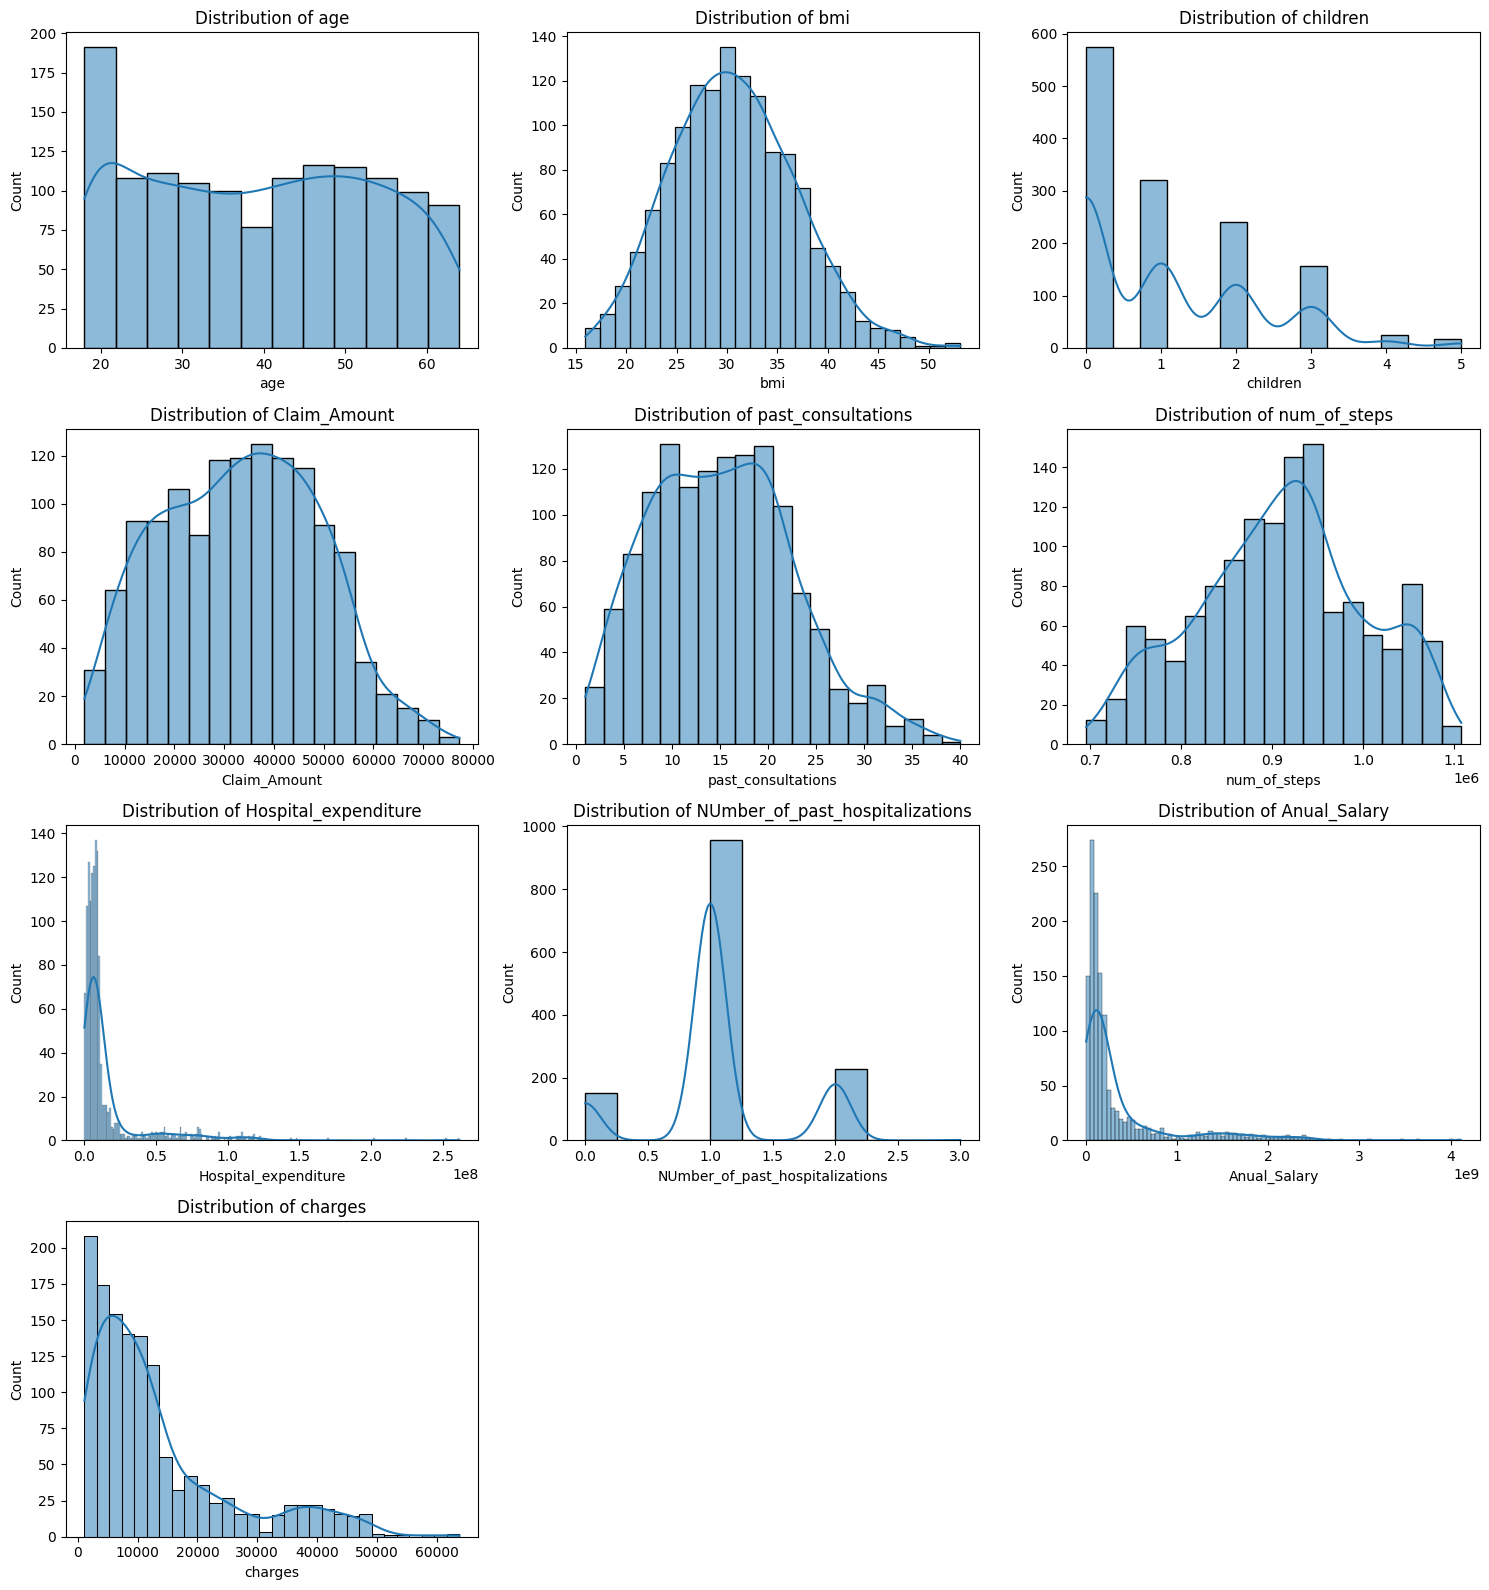

In [ ]:
# Visualizing the spread of distribution of numerical features across the data.

numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

# Calculating number of rows and columns for subplots
num_numerical_cols = len(numerical_cols)
num_cols = 3
num_rows = (num_numerical_cols + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(numerical_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  sns.histplot(df[col], kde=True)
  plt.xlabel(col)
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:

# Most numerical features show normal or right-skewed distributions with a few extreme values, indicating generally moderate behavior with some high-cost or high-income outliers.


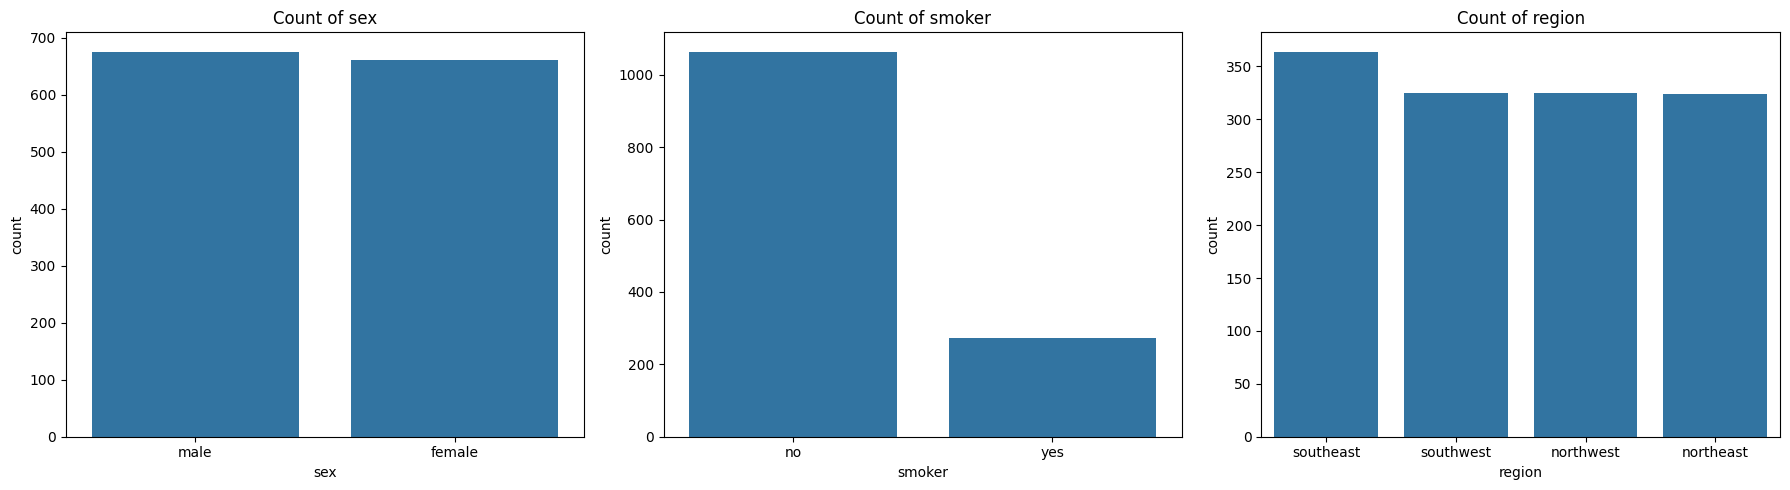

In [ ]:
# Analyzing the count of categorical values.

categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

num_categorical_cols = len(categorical_cols)
num_cols = 3
num_rows = (num_categorical_cols + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 6, num_rows * 5))

for i, col in enumerate(categorical_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  sns.countplot(x=df[col])
  plt.xlabel(col)
  plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

In [ ]:

# The dataset is fairly balanced across gender and regions, while non-smokers dominate, indicating potential smoking-related cost differences.


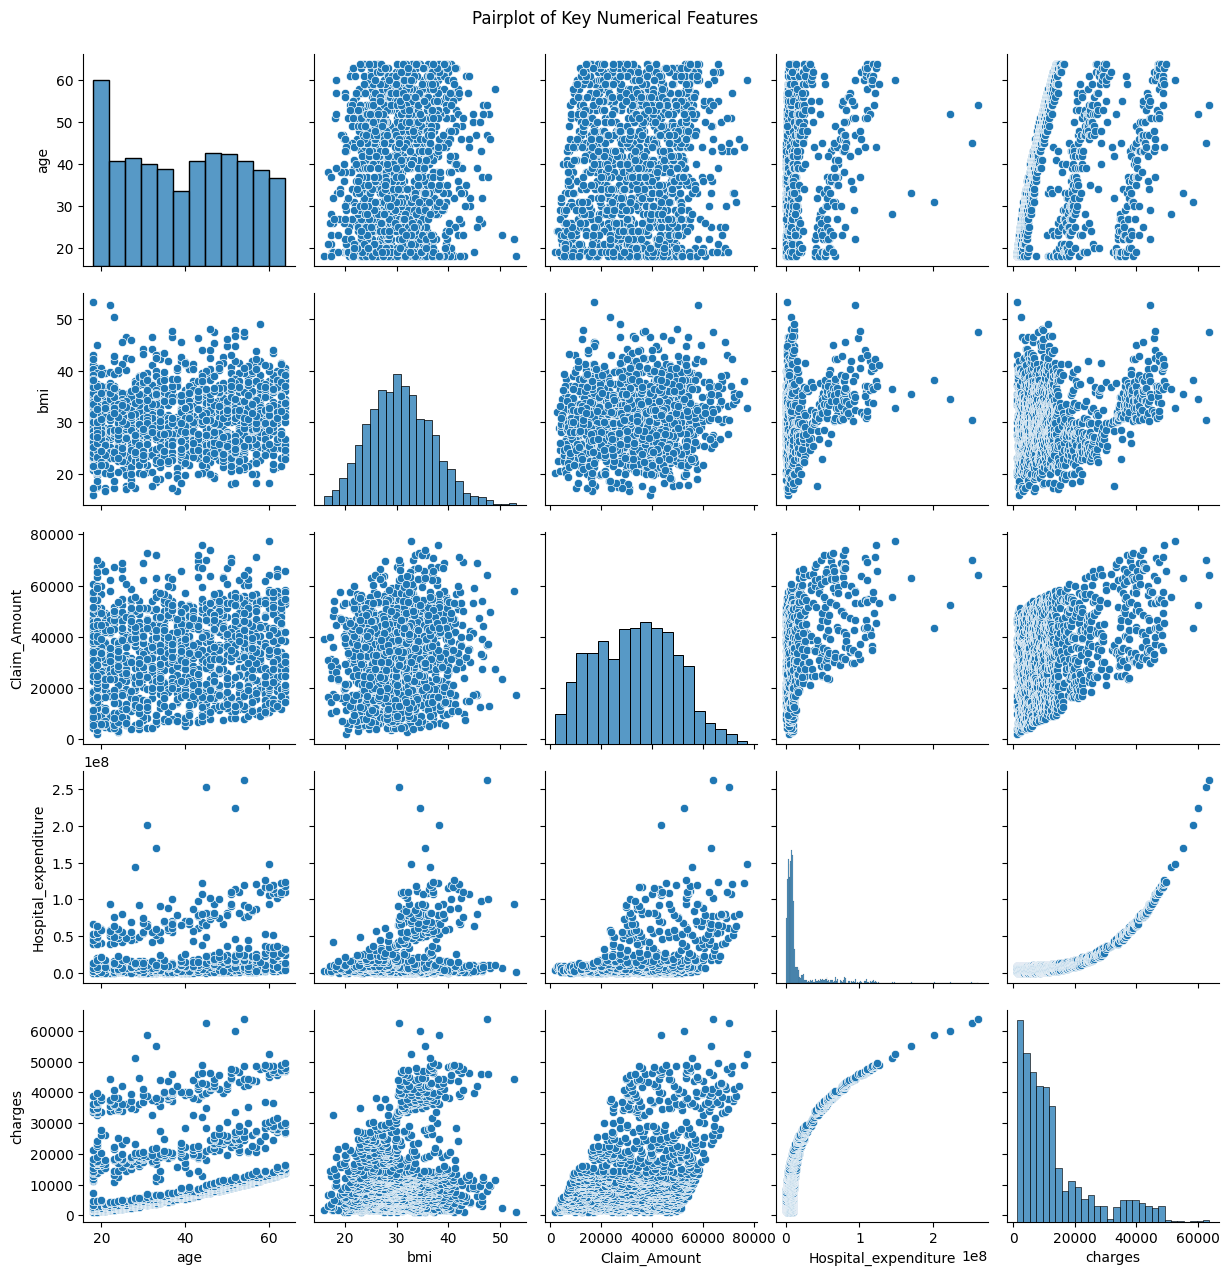

In [ ]:
'''Using pairplot to identify linear or non-linear relationships, trends, patterns and detect
outliers and clusters depicting the spread of data for various pairs of features plotted
simultaneously.'''

selected_numerical_cols = ['age', 'bmi', 'Claim_Amount', 'Hospital_expenditure', 'charges']
sns.pairplot(df[selected_numerical_cols])
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()

In [ ]:

# Charges and hospital expenditure show strong positive relationships with claim amount and BMI, while age has weaker effects, indicating cost-related variables are the strongest predictors.


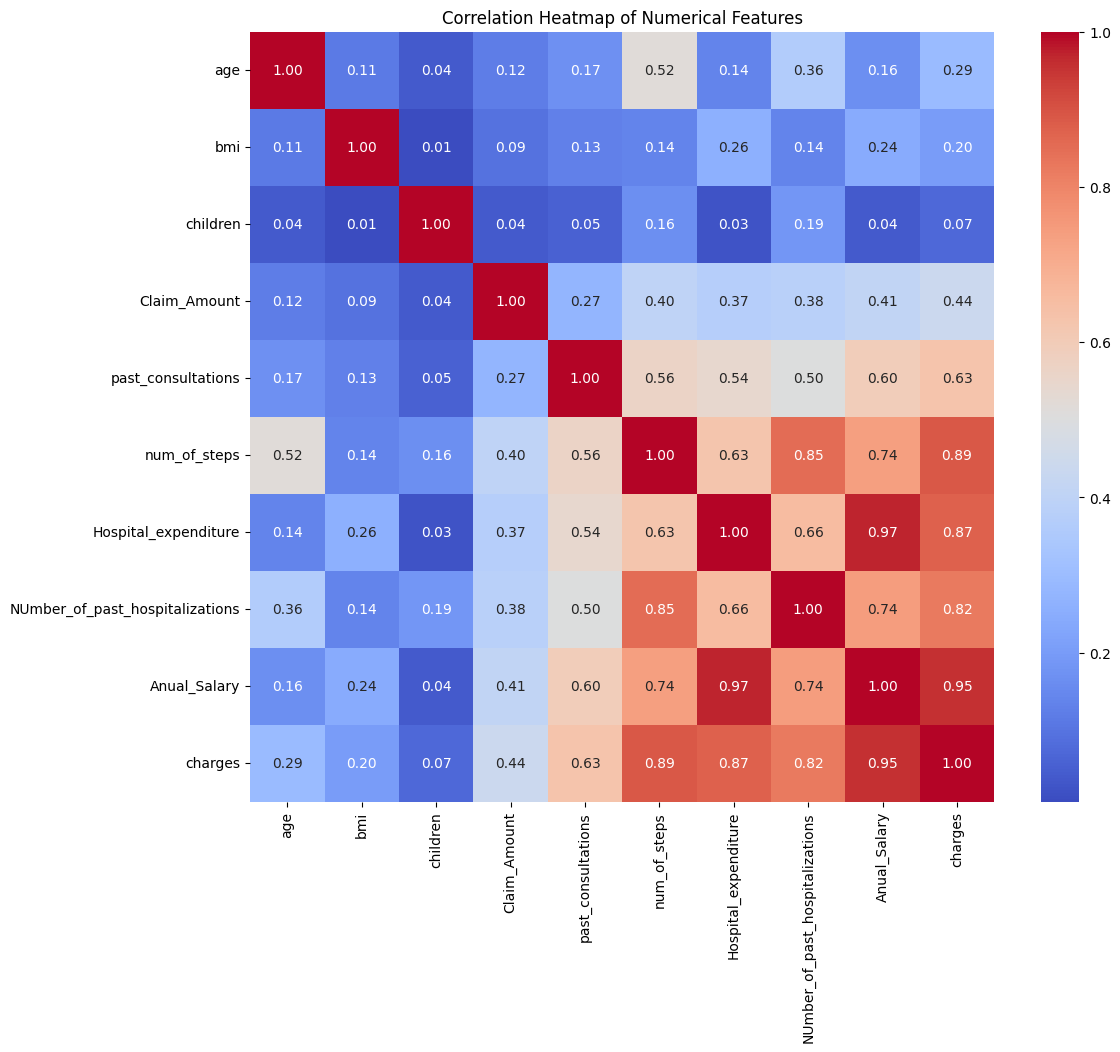

In [ ]:
'''Heatmap to depict correlations between each pair of features, determining the dependdency of
features on one another.'''

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:

# Medical charges strongly correlate with hospital expenditure, salary, steps, and past hospitalizations, making them key predictors, while most other features show weak relationships.


In [ ]:
# Checking for null values

df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
# The number of null values is very less in camparison to the number of records.
# Therefore, dropped.

df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Checking for duplicate records

df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1287 non-null   float64
 1   sex                              1287 non-null   object 
 2   bmi                              1287 non-null   float64
 3   children                         1287 non-null   float64
 4   smoker                           1287 non-null   object 
 5   Claim_Amount                     1287 non-null   float64
 6   past_consultations               1287 non-null   float64
 7   num_of_steps                     1287 non-null   float64
 8   Hospital_expenditure             1287 non-null   float64
 9   NUmber_of_past_hospitalizations  1287 non-null   float64
 10  Anual_Salary                     1287 non-null   float64
 11  region                           1287 non-null   object 
 12  charges                  

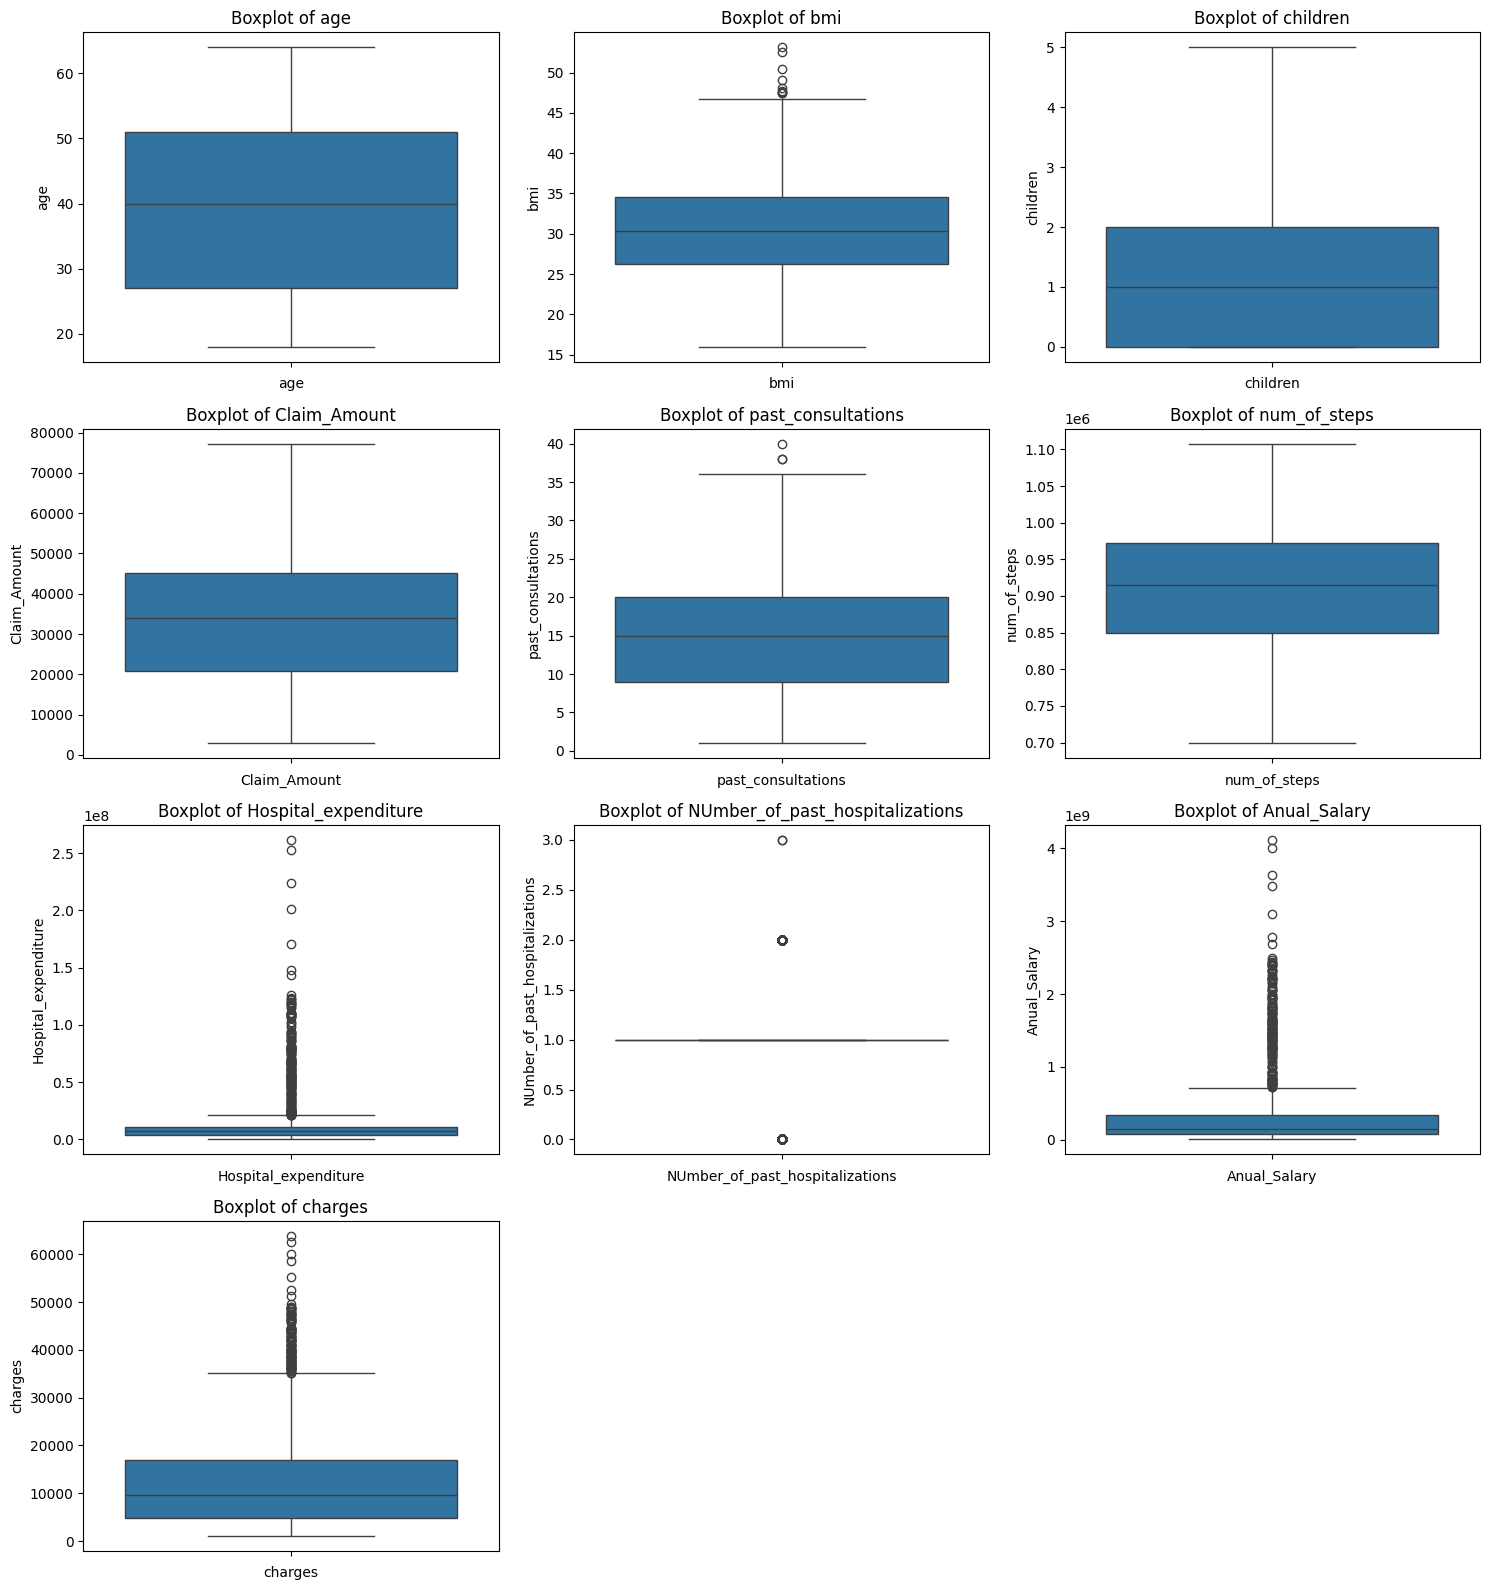

In [ ]:
# Plotting boxplots for each numerical feature to detect outliers.

numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

num_numerical_cols = len(numerical_cols)
num_cols = 3
num_rows = (num_numerical_cols + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(numerical_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:

# Several features, especially hospital expenditure, bmi, salary and consulatations, contain significant outliers, suggesting that a small group of customers drives disproportionately high costs.


In [ ]:
# Dropping outliers

out_list = ['bmi','past_consultations','Anual_Salary','Hospital_expenditure']
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR= Q3 -Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [ ]:
# Performing Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
  if (df[col].dtype == 'object'):
    df[col] = le.fit_transform(df[col])

In [ ]:
# Defining Target feature

x = df.drop(['charges'],axis = 1)
y = df['charges']                       # target column

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Initializing model

model = LinearRegression()

In [ ]:
# Training model

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Testing model

model_answers = model.predict(x_test)

In [ ]:
model_answers

array([12239.62090374,  5900.8666879 ,  4319.03525382,  3511.15321086,
       14081.55043812,  8551.10752246,  4516.3381085 , 20762.42467295,
        7952.16808608, 14176.67382098, 13201.6884345 , 16690.668058  ,
        2219.04754473,  4847.98921594,  2764.36642513,  6903.66491071,
        2598.08494969, 23086.98481404, 18194.71020517,  2942.6958558 ,
       12755.16804955, 11504.34734012, 20800.80972861, 15493.50715645,
        7986.67091911,  5390.9147755 , 10052.90224091,   538.0024049 ,
        2577.08702924,  2536.07984215, 12161.78680073,  7567.58450063,
        9893.80424111,  8824.57332363,  6627.30858272,  9267.0157459 ,
       12412.05036998,  8934.92240264,  5623.41857488,  2601.41707758,
        4793.10819442,  9811.48922507, 11351.98930167,  7144.46651726,
        8224.36619935, 11612.7575583 ,  8496.86475993,  4909.77564821,
        1379.78118798,  7169.01369644, 10671.68689493,  9568.7947221 ,
       18814.28671843,  7242.12310435, 14642.8061503 ,  2025.43905795,
      

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Defining accuracy of the model

r2_score(y_test,model_answers)*100

97.88798554796487

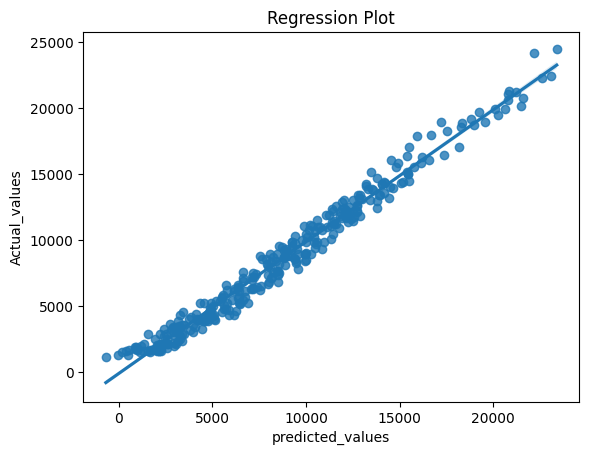

In [ ]:
# Plotting a regression plot to compare the error.

sns.regplot(x=model_answers,y = y_test)
plt.xlabel("predicted_values")
plt.ylabel("Actual_values")
plt.title("Regression Plot")
plt.show()

In [ ]:

# Predicted values closely follow actual values along the diagonal line, indicating the model performs well with high accuracy and low prediction error.


In [ ]:
# Defiining sample data

Sample=[27,1,25.600,0.0,0,30825.190070,9.0,821360.0,5.923489e+06,0.0,7.490390e+07,2]
sam_data = pd.DataFrame(columns = x_train.columns)
sam_data.loc[0] = Sample

In [ ]:
sam_data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,27.0,1.0,25.6,0.0,0.0,30825.19007,9.0,821360.0,5923489.0,0.0,74903900.0,2.0


In [ ]:
model.predict(sam_data)

array([5490.68791686])